<a href="https://colab.research.google.com/github/Misba2003/Plalyer_tracking/blob/main/Fraud_detection_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Accredian internship task for Data science and machine learning**


**Importing the dependencies**

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

**Upload Fraud.csv file**

**copy the path of the dataset**

In [3]:
df= pd.read_csv('/content/Fraud.csv')

In [4]:
df.shape

(1684686, 11)

In [6]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


**Exploring the dataset**

Checking for missing Values


In [8]:
print('Missing values: \n', df.isnull().sum())

Missing values: 
 step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           1
isFlaggedFraud    1
dtype: int64


**DAta types and memory usage**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1684686 entries, 0 to 1684685
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1684686 non-null  int64  
 1   type            1684686 non-null  object 
 2   amount          1684686 non-null  float64
 3   nameOrig        1684686 non-null  object 
 4   oldbalanceOrg   1684686 non-null  float64
 5   newbalanceOrig  1684686 non-null  float64
 6   nameDest        1684686 non-null  object 
 7   oldbalanceDest  1684686 non-null  float64
 8   newbalanceDest  1684686 non-null  float64
 9   isFraud         1684685 non-null  float64
 10  isFlaggedFraud  1684685 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 141.4+ MB


**SUmmary stats**

In [11]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.684686e+06,1.684686e+06,1.684686e+06,1.684686e+06,1.684686e+06,1.684686e+06,1.684685e+06,1684685.0
mean,6.966525e+01,1.624616e+05,8.577489e+05,8.788904e+05,9.934977e+05,1.117102e+06,1.073198e-03,0.0
std,5.664157e+01,2.698843e+05,2.920611e+06,2.956939e+06,2.305852e+06,2.406427e+06,3.274212e-02,0.0
min,1.000000e+00,6.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.800000e+01,1.309866e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,4.100000e+01,7.874172e+04,1.515100e+04,0.000000e+00,1.348945e+05,2.269150e+05,0.000000e+00,0.0
75%,1.340000e+02,2.182946e+05,1.234107e+05,1.656517e+05,9.428998e+05,1.156307e+06,0.000000e+00,0.0
max,1.590000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


**Printing Column names**

In [12]:
print("Columns:\n", df.columns.tolist())

Columns:
 ['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


**DATA CLEANING**

1. Handling missing values
2. Detect and treat outliers
3. check and handle multi-collinearity

In [13]:
# Percentage of missing values per column
missing_percent = df.isnull().mean() * 100
print("Missing value percentage:\n", missing_percent[missing_percent > 0])


Missing value percentage:
 isFraud           0.000059
isFlaggedFraud    0.000059
dtype: float64


The above missing values are low we can ignore them


In [15]:
df.dropna(inplace=True)

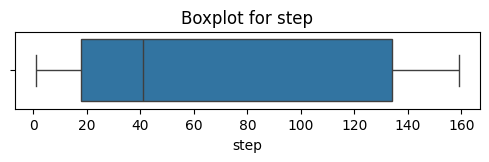

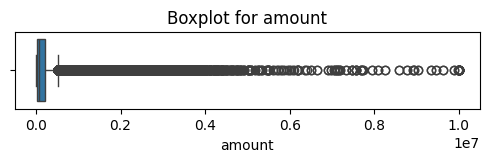

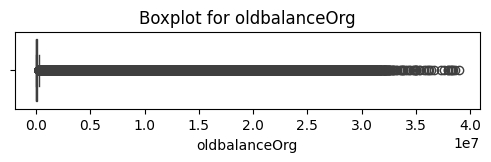

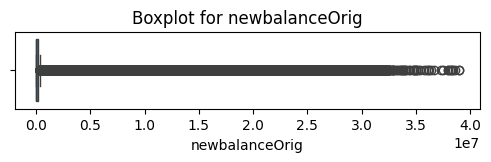

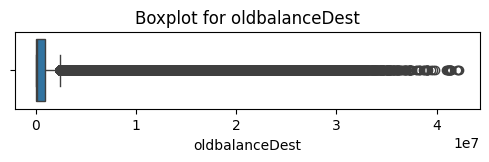

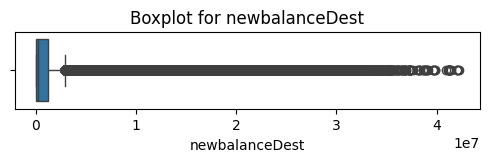

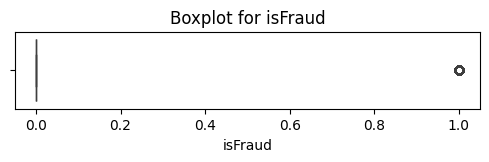

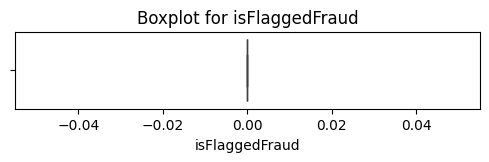

In [18]:
# Visualize numeric columns (adjust column names as needed)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


**Correlation matrix to check multi collinearity**


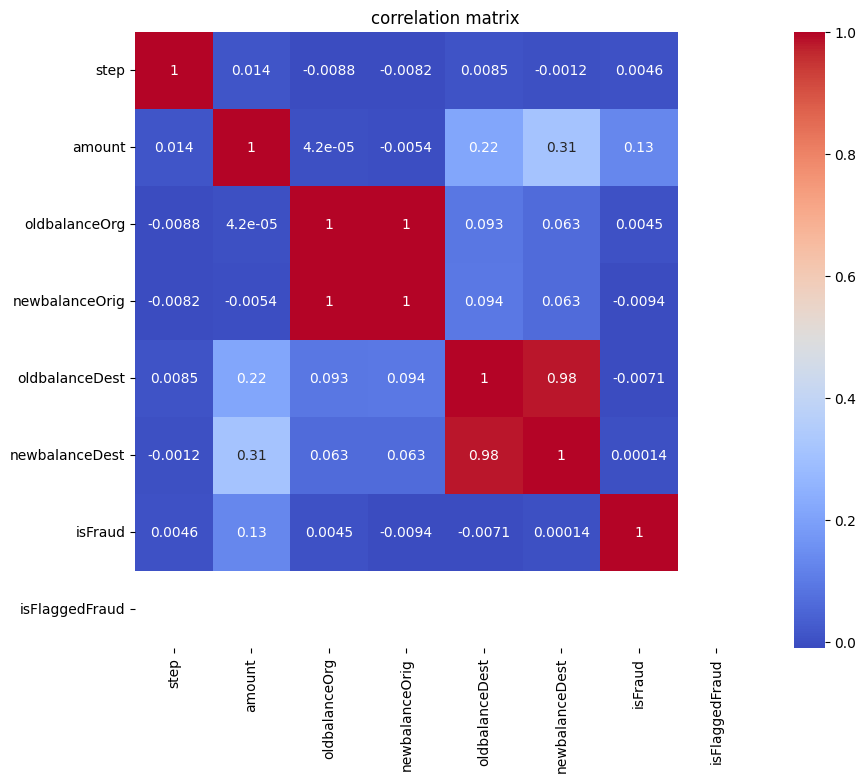

In [20]:

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("correlation matrix")
plt.show()


**MODEL BUILDING**

1. Preparing the data

In [22]:
# Drop unnecessary columns like names
df_model = df.drop(['nameOrig', 'nameDest'], axis=1, errors='ignore')

# Convert categorical features (e.g., 'type') if present
df_model = pd.get_dummies(df_model, drop_first=True)

# Separate features and target
X = df_model.drop('isFraud', axis=1)
y = df_model['isFraud']


2. Train Test split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

3. Train Random forest model

In [27]:
# Create the model
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    class_weight='balanced',  #handles class imbalance
    random_state=42,
    n_jobs=-1
)

# Fit the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

4. Evaluate the model

-Recall (sensitivity): to catch as many frauds as possible

-Precision: to avoid false accusations

-AUC-ROC: overall model effectiveness



In [33]:
# Predict
y_pred = rf_model.predict(X_test)

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_pred))


Confusion Matrix:
 [[336485     90]
 [    51    311]]

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    336575
         1.0       0.78      0.86      0.82       362

    accuracy                           1.00    336937
   macro avg       0.89      0.93      0.91    336937
weighted avg       1.00      1.00      1.00    336937

ROC AUC Score: 0.9294243112799844


5. Feature Importance

/tmp/ipython-input-35-1618400907.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


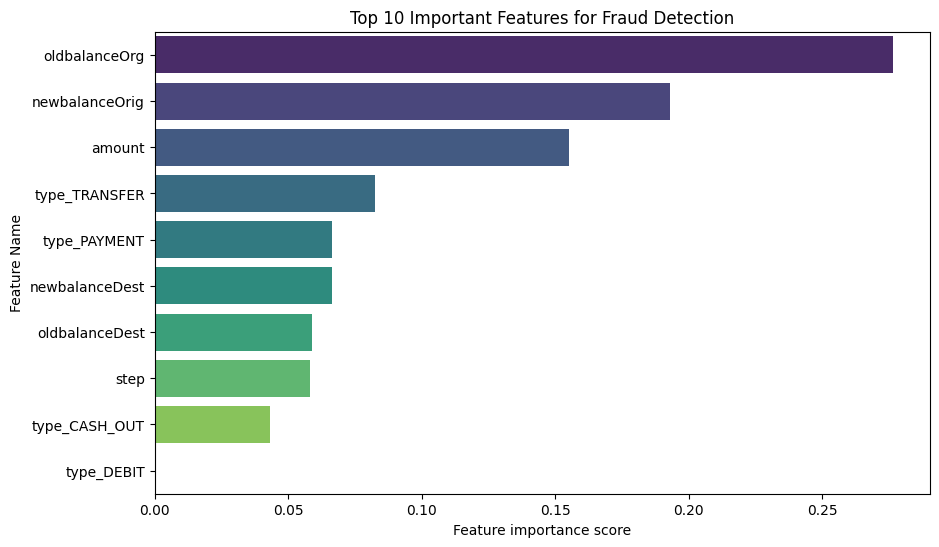

In [35]:

# Step 1: Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Step 2: sort them in ascending order
top_features = feature_importances.sort_values(ascending=False).head(10)

# Step 3: Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title('Top 10 Important Features for Fraud Detection')
plt.xlabel('Feature importance score')
plt.ylabel('Feature Name')
plt.show()


**Answers to the Questions given in the task**

1. **Data cleaning including missing values, outliers and Multicolliinearity**

⦁	Missing values: I found extremely low missing values in isFraud and isfllagedfraud(<0.0001%). These rows were safely dropped.

⦁	Outliers: Although transaction amount columns showed extreme values, they were retained because such outliers may indicate actual fraud, especially in financial transactions.

⦁	Multincollinearity: A correlation heatmap was used to assess multicollinearity. Most features were weakly correlated, so no major collinearity was found. I also removed non-informative ID columns(nameorig, nameDest).

**2. Describe your Fraud Detection Model in Elaboration**

⦁	I used Random Forest Classifier due to the size of the dataset and the class imbalance.

⦁	The model was trained with class_weight='balanced' to give more weight to rare fraud cases

⦁	It learned from transactional behavior, such as balances, transaction, types, and amounts to distinguish fraud from non-fraud.

⦁	I used 80% of the data for training and 20% for testing, with stratified sampling to preserve class ratios.

**3. How Did You Select Variables to Be Included in the Model?**

⦁	I removed irrelevant features like nameorig, nameDest(not useful for prediction)

⦁	I encoded the type column using one-hot encoding.

⦁	Also retained numerical features such as amount, oldbalanceOrg, newbalanceOrig, and step, which were meaningful according to the data dictionary.

⦁	Feature importance scores from the trained model confirmed that our selections were appropriate.

**4. Demonstrate the performance of the Model using the best set of Tools**

Model used: Random Forest with class balancing

Metrics:

⦁	Precision (fraud): 78%

⦁	Recall (fraud): 86%

⦁	F1-score (fraud): 82%

⦁	ROC AUC Score: 0.93

Conclusion: The model showed strong ability to detect frauds, while keeping false positives low. The recall value is high, which is critical in fraud detection.

**5. What Are the Key Factors That Predict Fraudulent Customers?**

According to Random Forest feature importance:

⦁	oldbalanceOrg: Large initial balance before suspicious transfers

⦁	newbalanceOrig: Sudden drop in sender’s balance.

⦁	amount: High transaction amount

⦁	type_TRANSFER: Transfer transactions are highly correlated with fraud

⦁	step: Some frauds occur during specific times.

**6. Do These Factors Make Sense? If Yes, How? If Not, How Not?**

Yes, they make perfect sense:

⦁	Fraudsters often aim to empty account with high balances

⦁	They prefer TTRANSFER or CASH_OUT types to move money quickly.

⦁	Large amounts are red flags in financial systems

⦁	These patterns match known fraud behavior in real-world finance.

**7. What Kind of Prevention Should Be Adopted While the Company Updates Its Infrastructure?**

⦁	Real-time transaction monitoring using ML-based risk scores.
⦁	Set dynamic thresholds based on account behavior (not just fixed limits like 200,000).

⦁	Monitor unusual transaction sequences (e.g., TRANSFER → CASH_OUT).

⦁	Flag high-risk transaction types (e.g., multiple large TRANSFERs from new accounts).

⦁	Implement multi-factor authentication before high-risk actions.

**8. Assuming These Actions Have Been Implemented, How Would You Determine If They Work?**

⦁	Compare fraud detection rate(recall) and false alarm rate before and after implementation

⦁	Track reduction in financial loss due to fraud.

⦁	use A/B testing to measure the impact of new rules or ML models.

⦁	Monitor customer complaints or chargebacks related to fraud.

⦁	Regularly audit flagged transactions and retrain models with new data.




